# Student Data Analysis & Visualization

## Introduction

This analysis is aimed at providing insight on the student on how different features affects student grade and performance. Keep Up!

## Imports & Basic EDA

In [1]:
# Imports

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read csv file into notebook
dataset = pd.read_csv("StudentsPerformance.csv")

In [3]:
#make a copy - incase we need the original dataset
dataset_ = dataset.copy()
dataset_

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
dataset_.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Calculating Mean Student Score

In [6]:
# Mean Student Score

student_score = (dataset_["math score"] + dataset_["reading score"] + dataset_["writing score"])/3
student_score

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [7]:
dataset_["student score"] = round(student_score, 2)

In [8]:
dataset_.to_csv("Studentdataperformance2.csv")

### Classifying students into Grade Class

Classification

A = 75 - 100 = First class
B = 60 - 74 = Second Class Upper
C = 50 - 59 = Second Class Lower
D = 35 - 49 = Pass
E = 0 - 34 = Fail

In [9]:
grade_class = []
for index, row in dataset_.iterrows():
    if row[7] <= 34:
        grade_class.append("Fail")
    elif row[7] >= 35 and row[7] < 50:
        grade_class.append("Pass")
    elif row[7] >= 50 and row[7] < 60:
        grade_class.append("Second Class Lower")
    elif row[7] >= 60 and row[7] < 75:
        grade_class.append("Second Class Upper")
    elif row[7] >= 75 :
        grade_class.append("First class")
    

In [10]:
dataset_["grade class"] = grade_class

In [11]:
dataset_.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,student score,grade class
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Second Class Upper
1,female,group C,some college,standard,completed,69,90,88,82.33,First class
2,female,group B,master's degree,standard,none,90,95,93,92.67,First class
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Pass
4,male,group C,some college,standard,none,76,78,75,76.33,First class
5,female,group B,associate's degree,standard,none,71,83,78,77.33,First class
6,female,group B,some college,standard,completed,88,95,92,91.67,First class
7,male,group B,some college,free/reduced,none,40,43,39,40.67,Pass
8,male,group D,high school,free/reduced,completed,64,64,67,65.00,Second Class Upper
9,female,group B,high school,free/reduced,none,38,60,50,49.33,Second Class Lower


In [12]:
dataset_.to_csv("Studentdataperformance2.csv")

#### Distribution of Student Average Score (Overall Average Performance)

14.250180366002386

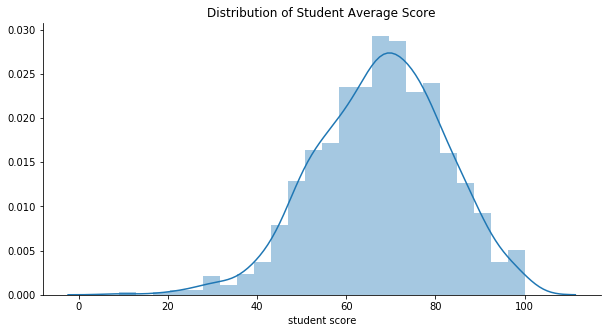

In [39]:
plt.figure(figsize=(10, 5))
#plt.subplots()
f = sns.distplot(dataset_["student score"], kde = True)
display(np.std(dataset_["student score"]))
plt.title("Distribution of Student Average Score", fontsize = 12 )
sns.despine()


This shows the Average student performance is inclined toward 40-80

#### Distribution of Student Score by Gender

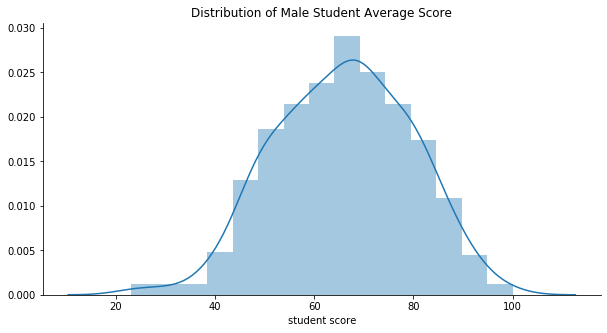

In [40]:
# Male Students Average score distribution
plt.figure(figsize=(10, 5))
sns.distplot(dataset_[dataset_["gender"] == "male"]["student score"], kde = True)
plt.title("Distribution of Male Student Average Score", fontsize = 12 )

sns.despine()
plt.show()


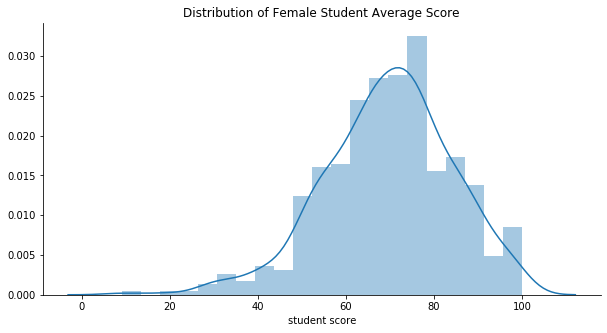

In [41]:
# Female Students Average score distribution
plt.figure(figsize=(10, 5))
sns.distplot(dataset_[dataset_["gender"] == "female"]["student score"], kde = True)
plt.title("Distribution of Female Student Average Score", fontsize = 12 )

sns.despine()
plt.show()

Between the Male & Female distribution, we can see that a higher number of female Students are more distributed towards the higher average score.

#### Classification of students by grade class

In [28]:
 df = dataset_["grade class"].value_counts()

In [29]:
fd = (df/1000)*100

In [30]:
lab = dataset_["grade class"].unique()

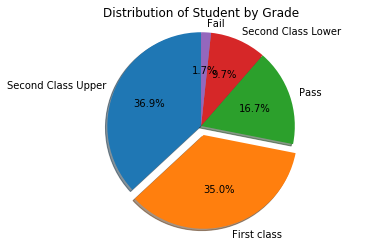

In [45]:
# Bar chart

labels = lab
values = fd
explode = (0,0.1,0,0,0)

fg1, ax1 = plt.subplots()
ax1.pie(fd, labels = labels, explode = explode, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis("equal")
plt.title("Distribution of Student by Grade", fontsize = 12 )

plt.show()

## Further Analysis 

Let's look at how each variable affect the overall performance of students

### Gender

<Figure size 864x360 with 0 Axes>

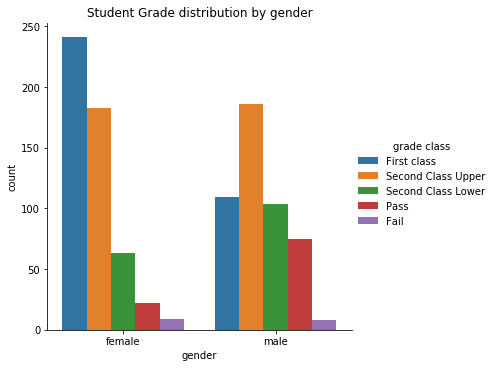

In [54]:
#Map showing relationship between Gender and grade class
hue = ['First class', 'Second Class Upper', 'Second Class Lower', 'Pass',
       'Fail']
plt.figure(figsize=(12, 5))

sns.catplot(x="gender", kind = "count", hue = "grade class", hue_order = hue, data = dataset_)
plt.title("Student Grade distribution by gender", fontsize = 12 )
plt.show()


This Shows the female gender has more First Class students compared to make and almost same amount of Second Class Upper students

### Race/Ethnicity

#### Race/Ethnicity

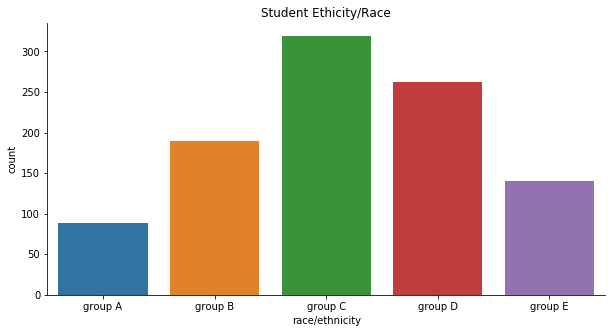

In [52]:
racc = ["group A", "group B", "group C", "group D", "group E"]
plt.figure(figsize=(10, 5))

sns.countplot("race/ethnicity", data = dataset_, order = racc)
plt.title("Student Ethicity/Race", fontsize = 12 )

sns.despine()

This indicates that Group C performs better compared to other groups

#### Performance by Race/Ethnicity and Grade Class

<Figure size 720x720 with 0 Axes>

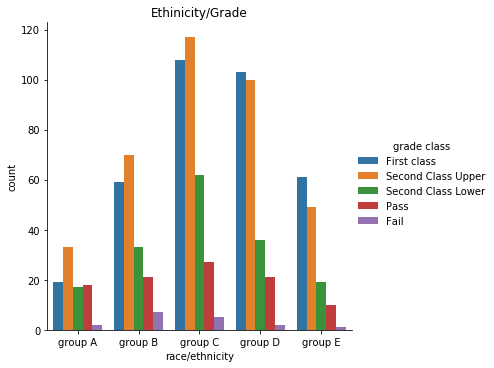

In [56]:
#Map showing relationship between race/ethnicity and grade class
rac = ['First class', 'Second Class Upper', 'Second Class Lower', 'Pass',
       'Fail']
racc = ["group A", "group B", "group C", "group D", "group E"]

plt.figure(figsize=(10, 10))
sns.catplot(x="race/ethnicity", kind = "count", order = racc, hue = "grade class", hue_order = rac, data = dataset_)
plt.title("Ethinicity/Grade", fontsize = 12 )

plt.show()

### Parental Level of Education

#### Parental Level of Education

In [152]:
dataset_["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

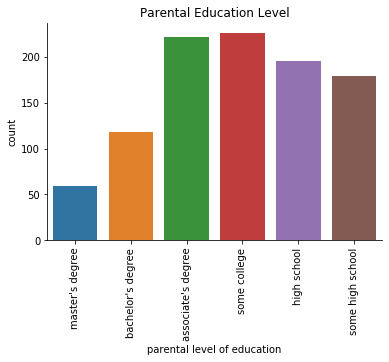

In [60]:
par = ["master's degree", "bachelor's degree", "associate's degree", 
       "some college", "high school", "some high school"]
sa = sns.countplot("parental level of education", data = dataset_, order = par)
plt.title("Parental Education Level", fontsize = 12 )

plt.xticks(rotation =90)
sns.despine()

#### Performance by Parental Level of Education and Grade Class

<Figure size 1440x360 with 0 Axes>

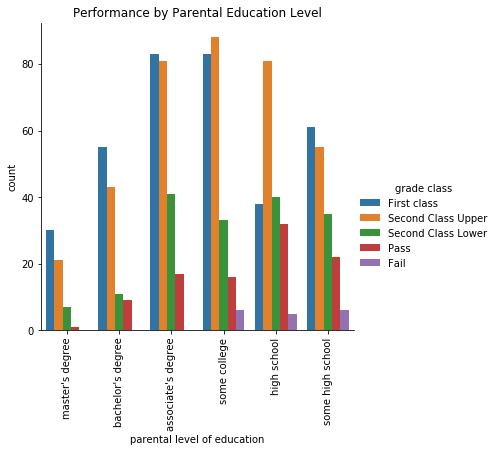

In [63]:
#Map showing relationship between race/ethnicity and grade class
rac = ['First class', 'Second Class Upper', 'Second Class Lower', 'Pass',
       'Fail']
racc = ["group A", "group B", "group C", "group D", "group E"]

plt.figure(figsize=(20, 5))

sns.catplot(x="parental level of education", kind = "count", 
            order = par, hue = "grade class", hue_order = rac, data = dataset_)
plt.xticks(rotation=90)
plt.title("Performance by Parental Education Level", fontsize = 12 )
plt.show()

Students whose parents have an associate degree and attended some college have the best overall performance

### Test Preparation Course

#### Test Preparation Course

In [161]:
dataset_["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

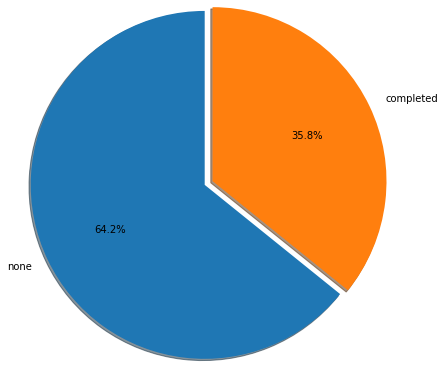

In [66]:
data = dataset_["test preparation course"].value_counts()
labels = ["none", "completed"]
explode = (0,0.1)

plt.pie(data, labels = labels , explode = explode, radius = 2,
        autopct = "%1.1f%%", shadow = True, startangle = 90)

#plt.title("Test Preparation ", fontsize = 12 )


plt.show()

64.2% of students didn't take any test preparation courses and only 35.8% completed the test preparation course.

#### Performance by Test Preparation Course

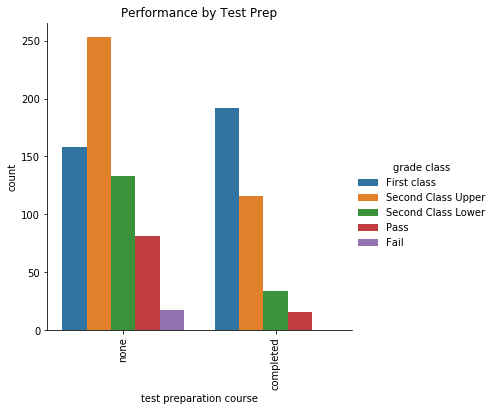

In [67]:
rac = ['First class', 'Second Class Upper', 'Second Class Lower', 'Pass',
       'Fail']
#racc = ["group A", "group B", "group C", "group D", "group E"]

sns.catplot(x="test preparation course", kind = "count",
            hue = "grade class", hue_order = rac, data = dataset_)
plt.title("Performance by Test Prep", fontsize = 12 )

plt.xticks(rotation=90)
plt.show()

Worthy to note that none of the students who completed the test preparation course failed.

### Lunch

#### Lunch

In [178]:
dataset_["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

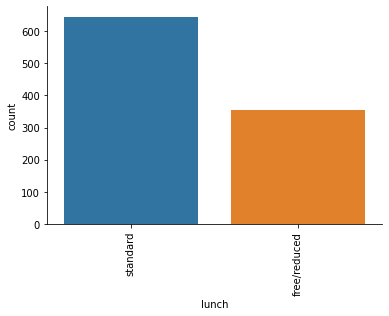

In [180]:

sa = sns.countplot("lunch", data = dataset_)
plt.xticks(rotation =90)
sns.despine()

#### Performance by Lunch

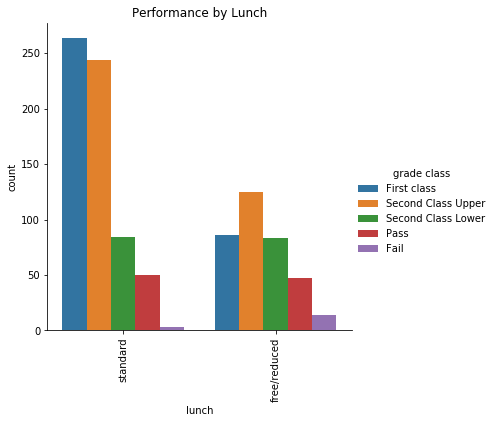

In [68]:
rac = ['First class', 'Second Class Upper', 'Second Class Lower', 'Pass',
       'Fail']
#racc = ["group A", "group B", "group C", "group D", "group E"]

sns.catplot(x="lunch", kind = "count",
            hue = "grade class", hue_order = rac, data = dataset_)

plt.title("Performance by Lunch", fontsize = 12 )

plt.xticks(rotation=90)
plt.show()

## Other Analysis

### Lunch & Test Preparation Course

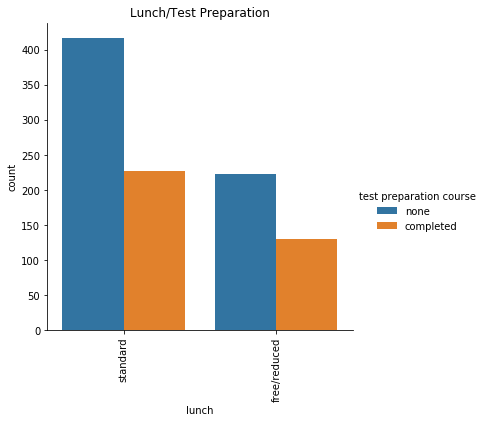

In [69]:
sns.catplot(x="lunch", kind = "count",
            hue = "test preparation course", data = dataset_)
plt.title("Lunch/Test Preparation", fontsize = 12 )

plt.xticks(rotation=90)
plt.show()

If we assume that it is the the rich kids who have standard lunch, then we can say a reasonable number of the rich kids didn't complete the test preparation course

In [188]:
pd.crosstab(dataset_["lunch"], dataset_["gender"])

gender,female,male
lunch,,
free/reduced,189,166
standard,329,316


### Gender & Lunch

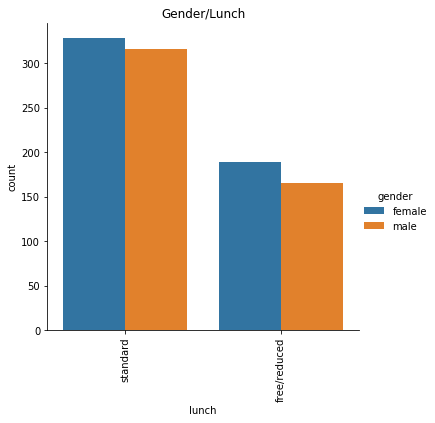

In [70]:
#rac = ['First class', 'Second Class Upper', 'Second Class Lower', 'Pass',
       #'Fail']
#racc = ["group A", "group B", "group C", "group D", "group E"]

sns.catplot(x="lunch", kind = "count",
            hue = "gender", data = dataset_)
plt.title("Gender/Lunch", fontsize = 12 )

plt.xticks(rotation=90)
plt.show()

### Gender & Test Scores

In [72]:
_data = dataset_["gender"], dataset_["math score"], dataset_["reading score"], dataset_["writing score"]

In [73]:
_data = pd.DataFrame(_data)

In [74]:
newdata = _data.T
newdata

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75
...,...,...,...,...
995,female,88,99,95
996,male,62,55,55
997,female,59,71,65
998,female,68,78,77


In [75]:
new = newdata.sort_values(by = "gender", ascending = False)

In [76]:
new

,gender,math score,reading score,writing score
331,male,47,37,35
406,male,65,65,63
805,male,75,81,74
398,male,74,63,57
399,male,60,59,54
...,...,...,...,...
466,female,26,31,38
468,female,77,88,85
470,female,83,85,90
471,female,63,69,74


In [77]:
#convert the test scores to float
new["math score"] = pd.to_numeric(new["math score"], downcast = "float")
new["reading score"] = pd.to_numeric(new["reading score"], downcast = "float")
new["writing score"] = pd.to_numeric(new["writing score"], downcast = "float")

In [78]:
new = new.groupby(by="gender").mean()

In [79]:
new

,math score,reading score,writing score
gender,,,
female,63.633205,72.608109,72.467178
male,68.728218,65.473030,63.311203


Text(0.5, 1.0, 'Gender/Test Score')

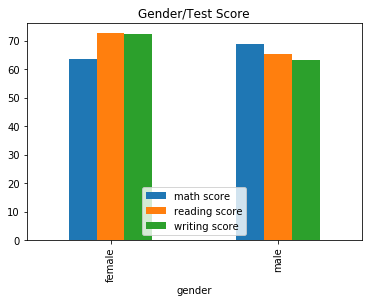

In [80]:
new.plot(kind = "bar")
plt.title("Gender/Test Score", fontsize = 12 )


### Test Preparation course and Test Scores

In [81]:
dataset_.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,student score,grade class
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Second Class Upper
1,female,group C,some college,standard,completed,69,90,88,82.33,First class
2,female,group B,master's degree,standard,none,90,95,93,92.67,First class
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Pass
4,male,group C,some college,standard,none,76,78,75,76.33,First class


In [82]:
tes = dataset_["test preparation course"], dataset_["math score"], dataset_["reading score"], dataset_["writing score"]
test = pd.DataFrame(tes).T

In [83]:
#convert the test scores to float
test["math score"] = pd.to_numeric(test["math score"], downcast = "float")
test["reading score"] = pd.to_numeric(test["reading score"], downcast = "float")
test["writing score"] = pd.to_numeric(test["writing score"], downcast = "float")

In [84]:
test = test.groupby(by="test preparation course").mean()

In [85]:
test

,math score,reading score,writing score
test preparation course,,,
completed,69.695534,73.893852,74.418991
none,64.077881,66.534271,64.504669


Text(0.5, 1.0, 'Test Prep/Test Score')

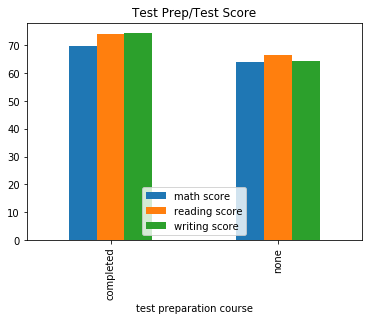

In [86]:
test.plot(kind="bar")
plt.title("Test Prep/Test Score", fontsize = 12 )
